In [ ]:
==================================================
ML LEARNING JOURNEY - DAY 16
==================================================
Week: 3 of 24
Day: 16 of 168
Date: November 13, 2025 (Tuesday)
Topic: Lunar Lander Environment Exploration
Overall Progress: 9.5%

Week 3 Progress:
✅ Day 15: RL Theory & Setup
🔄 Day 16: Environment Exploration (TODAY!)
⬜ Day 17: Implement DQN Architecture
⬜ Day 18: Training & Optimization
⬜ Day 19: Visualization & Analysis
⬜ Day 20: Web Deployment
⬜ Day 21: Documentation & GitHub

Progress: 14% (1/7 days)
==================================================

🎯 Today's Learning Objectives:
1. Understand Lunar Lander environment specs
2. Explore state space (8 dimensions)
3. Test all 4 actions (do nothing, left, main, right)
4. Analyze reward function in detail
5. Establish baseline with random agent
6. Visualize environment behavior

📚 Today's Structure:
   Part 1 (1.5h): Environment Setup & Testing
   Part 2 (1.5h): State/Action Space Analysis
   Part 3 (2h): Random Agent Baseline
   Part 4 (1h): Data Collection & Visualization

🎯 SUCCESS CRITERIA:
   ✅ Successfully render Lunar Lander environment
   ✅ Understand all 8 state variables
   ✅ Test each of 4 actions
   ✅ Collect baseline performance data
   ✅ Create reward distribution plot
   ✅ Ready for DQN implementation tomorrow!

==================================================

In [ ]:
---

# 🚀 PART 1: ENVIRONMENT SETUP & FIRST LOOK

## 1.1 Import Required Libraries

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import deque
import time

# Set random seeds for reproducibility
np.random.seed(42)

print("✅ Libraries imported successfully!")
print(f"Gymnasium version: {gym.__version__}")

✅ Libraries imported successfully!
Gymnasium version: 1.1.1


In [ ]:
## 1.2 Create Lunar Lander Environment

**What is Lunar Lander?**
- Classic RL environment where agent must land a spacecraft
- Physics-based simulation
- Continuous state space, discrete action space
- Perfect for learning DQN!

In [3]:
# Create environment (without rendering for now)
env = gym.make('LunarLander-v3')

print("✅ Lunar Lander environment created!")
print(f"\nEnvironment Info:")
print(f"  State space: {env.observation_space}")
print(f"  Action space: {env.action_space}")
print(f"  Max episode steps: {env.spec.max_episode_steps}")

✅ Lunar Lander environment created!

Environment Info:
  State space: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)
  Action space: Discrete(4)
  Max episode steps: 1000


In [ ]:
## 1.3 Reset Environment and Examine Initial State

In [4]:
# Reset environment to get initial observation
observation, info = env.reset(seed=42)

print("Initial observation (state):")
print(observation)
print(f"\nState shape: {observation.shape}")
print(f"State type: {type(observation)}")

Initial observation (state):
[ 0.00229702  1.4181306   0.2326471   0.3204666  -0.00265488 -0.05269805
  0.          0.        ]

State shape: (8,)
State type: <class 'numpy.ndarray'>


In [ ]:
---

# 🔍 PART 2: STATE SPACE ANALYSIS (8 DIMENSIONS)

## 2.1 Understanding the 8 State Variables

**The Lunar Lander state consists of 8 values:**

1. **x-position** (horizontal position)
   - Range: roughly -1.5 to +1.5
   - Landing pad is at x=0

2. **y-position** (vertical position)
   - Range: 0 to ~1.5
   - Landing pad is at y=0
   - Starts high, must descend

3. **x-velocity** (horizontal speed)
   - Negative = moving left
   - Positive = moving right

4. **y-velocity** (vertical speed)
   - Negative = moving down
   - Positive = moving up

5. **angle** (tilt of lander)
   - 0 = perfectly upright
   - Negative = tilted left
   - Positive = tilted right

6. **angular velocity** (rotation speed)
   - How fast the lander is rotating

7. **left leg contact** (boolean: 0 or 1)
   - 1 = left leg touching ground
   - 0 = left leg in air

8. **right leg contact** (boolean: 0 or 1)
   - 1 = right leg touching ground
   - 0 = right leg in air

In [5]:
# Let's label our state variables for clarity
state_labels = [
    'x_position',
    'y_position',
    'x_velocity',
    'y_velocity',
    'angle',
    'angular_velocity',
    'left_leg_contact',
    'right_leg_contact'
]

# Display current state with labels
print("Current State Values:")
print("=" * 50)
for label, value in zip(state_labels, observation):
    print(f"{label:20s}: {value:8.4f}")
print("=" * 50)

Current State Values:
x_position          :   0.0023
y_position          :   1.4181
x_velocity          :   0.2326
y_velocity          :   0.3205
angle               :  -0.0027
angular_velocity    :  -0.0527
left_leg_contact    :   0.0000
right_leg_contact   :   0.0000


In [ ]:
## 2.2 Collect States from Multiple Resets

Let's see how initial states vary:

In [6]:
# Collect initial states from 100 random resets
initial_states = []

for i in range(100):
    obs, _ = env.reset()
    initial_states.append(obs)

initial_states = np.array(initial_states)

print("Initial State Statistics (over 100 resets):")
print("=" * 70)
print(f"{'Variable':<20} {'Min':>10} {'Max':>10} {'Mean':>10} {'Std':>10}")
print("=" * 70)

for i, label in enumerate(state_labels):
    print(f"{label:<20} {initial_states[:, i].min():10.4f} "
          f"{initial_states[:, i].max():10.4f} "
          f"{initial_states[:, i].mean():10.4f} "
          f"{initial_states[:, i].std():10.4f}")

print("=" * 70)

Initial State Statistics (over 100 resets):
Variable                    Min        Max       Mean        Std
x_position              -0.0079     0.0079    -0.0008     0.0046
y_position               1.3984     1.4215     1.4103     0.0069
x_velocity              -0.7964     0.7974    -0.0793     0.4644
y_velocity              -0.5545     0.4687    -0.0292     0.3051
angle                   -0.0091     0.0091     0.0009     0.0053
angular_velocity        -0.1806     0.1804     0.0180     0.1052
left_leg_contact         0.0000     0.0000     0.0000     0.0000
right_leg_contact        0.0000     0.0000     0.0000     0.0000


In [ ]:
---

# 🎮 PART 3: ACTION SPACE ANALYSIS (4 ACTIONS)

## 3.1 Understanding the 4 Actions

**Lunar Lander has 4 discrete actions:**

- **Action 0:** Do nothing (coast)
- **Action 1:** Fire left orientation engine
- **Action 2:** Fire main engine (downward thrust)
- **Action 3:** Fire right orientation engine

**Key points:**
- Each action has a fuel cost (-0.3 reward per frame)
- Main engine is most powerful
- Side engines help with orientation

In [7]:
action_names = [
    "Do Nothing",
    "Fire Left Engine",
    "Fire Main Engine",
    "Fire Right Engine"
]

print("Available Actions:")
print("=" * 40)
for action, name in enumerate(action_names):
    print(f"Action {action}: {name}")
print("=" * 40)

Available Actions:
Action 0: Do Nothing
Action 1: Fire Left Engine
Action 2: Fire Main Engine
Action 3: Fire Right Engine


In [ ]:
## 3.2 Test Each Action

Let's see what each action does to our state:

In [8]:
# Test each action for 10 steps
for action in range(4):
    print(f"\n{'='*60}")
    print(f"Testing Action {action}: {action_names[action]}")
    print(f"{'='*60}")
    
    # Reset environment
    obs, _ = env.reset(seed=42)
    
    print("\nInitial state:")
    for label, value in zip(state_labels[:6], obs[:6]):  # Show first 6 values
        print(f"  {label:20s}: {value:8.4f}")
    
    # Take action 10 times
    total_reward = 0
    for step in range(10):
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        
        if terminated or truncated:
            break
    
    print("\nState after 10 steps:")
    for label, value in zip(state_labels[:6], obs[:6]):
        print(f"  {label:20s}: {value:8.4f}")
    
    print(f"\nReward collected: {total_reward:.2f}")


Testing Action 0: Do Nothing

Initial state:
  x_position          :   0.0023
  y_position          :   1.4181
  x_velocity          :   0.2326
  y_velocity          :   0.3205
  angle               :  -0.0027
  angular_velocity    :  -0.0527

State after 10 steps:
  x_position          :   0.0253
  y_position          :   1.4575
  x_velocity          :   0.2324
  y_velocity          :   0.0548
  angle               :  -0.0287
  angular_velocity    :  -0.0520

Reward collected: 9.17

Testing Action 1: Fire Left Engine

Initial state:
  x_position          :   0.0023
  y_position          :   1.4181
  x_velocity          :   0.2326
  y_velocity          :   0.3205
  angle               :  -0.0027
  angular_velocity    :  -0.0527

State after 10 steps:
  x_position          :   0.0208
  y_position          :   1.4577
  x_velocity          :   0.1305
  y_velocity          :   0.0545
  angle               :   0.0842
  angular_velocity    :   0.3557

Reward collected: 13.04

Testing Action

In [ ]:
---

# 📊 PART 4: REWARD FUNCTION ANALYSIS

## 4.1 Understanding the Reward Function

**The reward function encourages:**

**Positive Rewards:**
- Landing on the pad: +100 to +140 points
- Each leg touching ground: +10 points
- Moving towards pad: small positive rewards

**Negative Rewards:**
- Crashing: -100 points
- Using engines: -0.3 points per frame per engine
- Moving away from pad: small negative rewards

**Goal:** Maximize total reward = land safely with minimal fuel use!

In [ ]:
## 4.2 Simulate Complete Episode

Let's watch what happens in a full episode:

In [9]:
# Run one complete episode with random actions
obs, _ = env.reset(seed=42)

episode_rewards = []
episode_states = []
episode_actions = []

total_reward = 0
step = 0

while True:
    # Random action
    action = env.action_space.sample()
    
    # Take action
    obs, reward, terminated, truncated, info = env.step(action)
    
    # Store data
    episode_rewards.append(reward)
    episode_states.append(obs)
    episode_actions.append(action)
    
    total_reward += reward
    step += 1
    
    if terminated or truncated:
        break

print(f"Episode finished!")
print(f"Total steps: {step}")
print(f"Total reward: {total_reward:.2f}")
print(f"\nFinal state:")
for label, value in zip(state_labels, obs):
    print(f"  {label:20s}: {value:8.4f}")

Episode finished!
Total steps: 126
Total reward: -163.50

Final state:
  x_position          :   0.3672
  y_position          :  -0.1391
  x_velocity          :   0.9522
  y_velocity          :  -0.1253
  angle               :  -0.3647
  angular_velocity    :   0.6696
  left_leg_contact    :   0.0000
  right_leg_contact   :   1.0000


In [ ]:
## 4.3 Visualize Reward Over Time

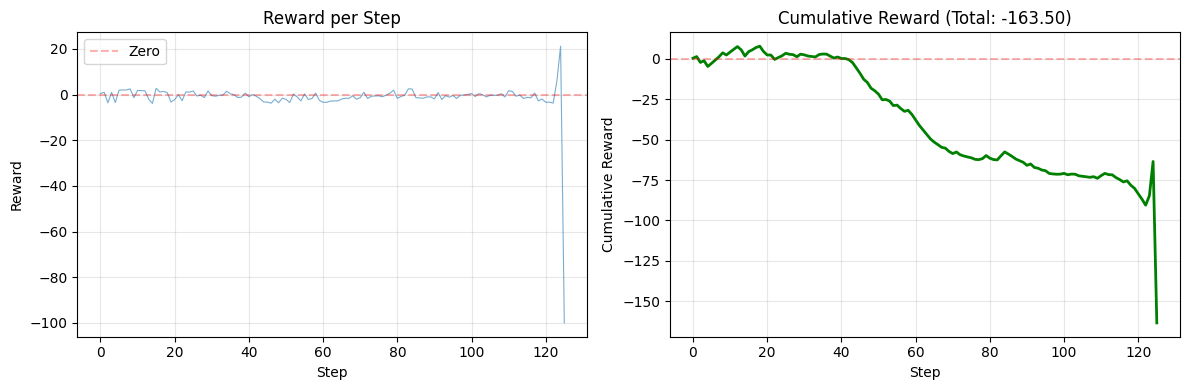


Reward Statistics:
  Mean reward per step: -1.2976
  Max reward in step: 21.2038
  Min reward in step: -100.0000


In [10]:
# Plot rewards over episode
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(episode_rewards, alpha=0.6, linewidth=0.8)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3, label='Zero')
plt.xlabel('Step')
plt.ylabel('Reward')
plt.title('Reward per Step')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
cumulative_rewards = np.cumsum(episode_rewards)
plt.plot(cumulative_rewards, color='green', linewidth=2)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title(f'Cumulative Reward (Total: {total_reward:.2f})')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nReward Statistics:")
print(f"  Mean reward per step: {np.mean(episode_rewards):.4f}")
print(f"  Max reward in step: {np.max(episode_rewards):.4f}")
print(f"  Min reward in step: {np.min(episode_rewards):.4f}")

In [ ]:
---

# 🎲 PART 5: RANDOM AGENT BASELINE

## 5.1 Run Multiple Episodes with Random Actions

**Why establish a baseline?**
- Understand how hard the problem is
- Compare our trained agent against random performance
- Set realistic expectations

In [11]:
def run_random_agent(n_episodes=100):
    """
    Run random agent for n episodes and collect statistics
    """
    episode_rewards = []
    episode_lengths = []
    
    for episode in range(n_episodes):
        obs, _ = env.reset()
        total_reward = 0
        steps = 0
        
        while True:
            action = env.action_space.sample()  # Random action
            obs, reward, terminated, truncated, info = env.step(action)
            
            total_reward += reward
            steps += 1
            
            if terminated or truncated:
                break
        
        episode_rewards.append(total_reward)
        episode_lengths.append(steps)
        
        # Progress indicator
        if (episode + 1) % 20 == 0:
            print(f"Completed {episode + 1}/{n_episodes} episodes")
    
    return episode_rewards, episode_lengths

# Run baseline
print("Running 100 episodes with random agent...\n")
baseline_rewards, baseline_lengths = run_random_agent(100)
print("\n✅ Baseline collection complete!")

Running 100 episodes with random agent...

Completed 20/100 episodes
Completed 40/100 episodes
Completed 60/100 episodes
Completed 80/100 episodes
Completed 100/100 episodes

✅ Baseline collection complete!


In [ ]:
## 5.2 Analyze Random Agent Performance

In [12]:
# Calculate statistics
mean_reward = np.mean(baseline_rewards)
std_reward = np.std(baseline_rewards)
max_reward = np.max(baseline_rewards)
min_reward = np.min(baseline_rewards)

print("=" * 60)
print("RANDOM AGENT BASELINE PERFORMANCE")
print("=" * 60)
print(f"Episodes run: 100")
print(f"\nReward Statistics:")
print(f"  Mean reward:    {mean_reward:8.2f}")
print(f"  Std deviation:  {std_reward:8.2f}")
print(f"  Max reward:     {max_reward:8.2f}")
print(f"  Min reward:     {min_reward:8.2f}")
print(f"\nEpisode Length:")
print(f"  Mean steps:     {np.mean(baseline_lengths):8.2f}")
print(f"  Max steps:      {np.max(baseline_lengths):8.0f}")
print(f"  Min steps:      {np.min(baseline_lengths):8.0f}")
print("\n" + "=" * 60)
print("🎯 GOAL: Our DQN agent should beat this baseline!")
print("   Target: Average reward > 200")
print("=" * 60)

RANDOM AGENT BASELINE PERFORMANCE
Episodes run: 100

Reward Statistics:
  Mean reward:     -191.68
  Std deviation:    124.60
  Max reward:        -4.61
  Min reward:      -555.18

Episode Length:
  Mean steps:        89.05
  Max steps:           138
  Min steps:            58

🎯 GOAL: Our DQN agent should beat this baseline!
   Target: Average reward > 200


In [ ]:
## 5.3 Visualize Baseline Distribution

/var/folders/jy/mnc51c3n13n45tk4xypjbmtc0000gn/T/ipykernel_36086/2318537897.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 1].boxplot([baseline_rewards, baseline_lengths],


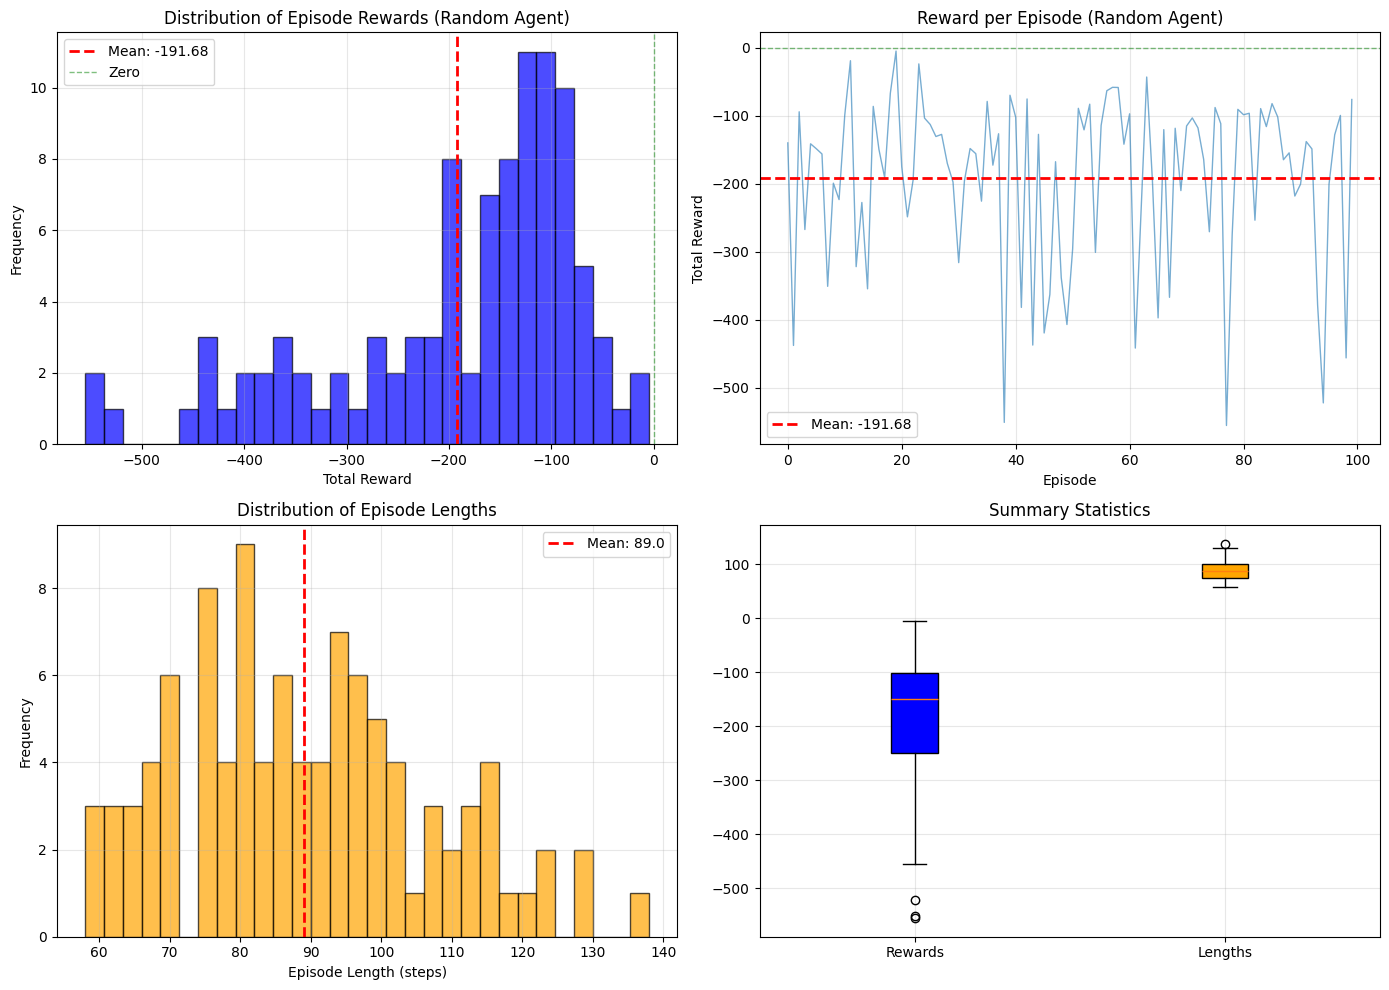


📊 Key Insights:
  - Random agent performs poorly (mean reward: -191.68)
  - High variance in performance (std: 124.60)
  - Episodes are short (mean: 89.0 steps)
  - Most episodes end in crashes (negative rewards)


In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Reward distribution
axes[0, 0].hist(baseline_rewards, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].axvline(mean_reward, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_reward:.2f}')
axes[0, 0].axvline(0, color='green', linestyle='--', linewidth=1, alpha=0.5, label='Zero')
axes[0, 0].set_xlabel('Total Reward')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Episode Rewards (Random Agent)')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Rewards over episodes
axes[0, 1].plot(baseline_rewards, alpha=0.6, linewidth=1)
axes[0, 1].axhline(mean_reward, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_reward:.2f}')
axes[0, 1].axhline(0, color='green', linestyle='--', linewidth=1, alpha=0.5)
axes[0, 1].set_xlabel('Episode')
axes[0, 1].set_ylabel('Total Reward')
axes[0, 1].set_title('Reward per Episode (Random Agent)')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Episode length distribution
axes[1, 0].hist(baseline_lengths, bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1, 0].axvline(np.mean(baseline_lengths), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {np.mean(baseline_lengths):.1f}')
axes[1, 0].set_xlabel('Episode Length (steps)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Episode Lengths')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Box plot summary
bp = axes[1, 1].boxplot([baseline_rewards, baseline_lengths], 
                        labels=['Rewards', 'Lengths'],
                        patch_artist=True)
bp['boxes'][0].set_facecolor('blue')
bp['boxes'][1].set_facecolor('orange')
axes[1, 1].set_title('Summary Statistics')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print(f"  - Random agent performs poorly (mean reward: {mean_reward:.2f})")
print(f"  - High variance in performance (std: {std_reward:.2f})")
print(f"  - Episodes are short (mean: {np.mean(baseline_lengths):.1f} steps)")
print(f"  - Most episodes end in crashes (negative rewards)")

In [ ]:
---

# 📈 PART 6: ACTION DISTRIBUTION ANALYSIS

## 6.1 Track Action Usage in Random Agent

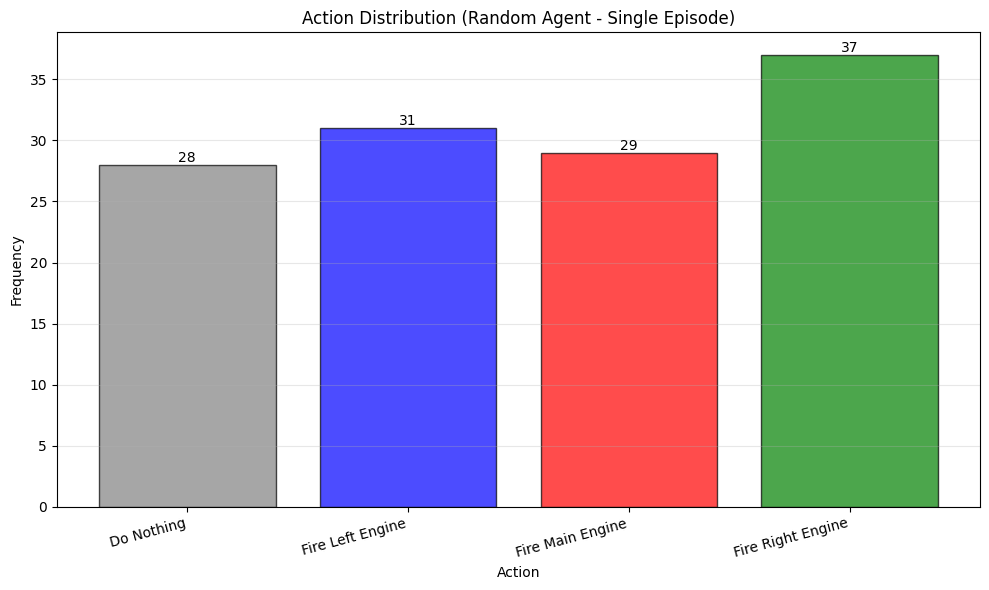


Action usage:
  Action 0 (Do Nothing): 28 times (22.4%)
  Action 1 (Fire Left Engine): 31 times (24.8%)
  Action 2 (Fire Main Engine): 29 times (23.2%)
  Action 3 (Fire Right Engine): 37 times (29.6%)


In [14]:
# Run one episode and track action distribution
obs, _ = env.reset(seed=42)
action_counts = [0, 0, 0, 0]

while True:
    action = env.action_space.sample()
    action_counts[action] += 1
    
    obs, reward, terminated, truncated, info = env.step(action)
    
    if terminated or truncated:
        break

# Visualize action distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(range(4), action_counts, color=['gray', 'blue', 'red', 'green'], alpha=0.7, edgecolor='black')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution (Random Agent - Single Episode)')
plt.xticks(range(4), action_names, rotation=15, ha='right')
plt.grid(alpha=0.3, axis='y')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{action_counts[i]}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nAction usage:")
total_actions = sum(action_counts)
for i, (name, count) in enumerate(zip(action_names, action_counts)):
    percentage = (count / total_actions) * 100
    print(f"  Action {i} ({name}): {count} times ({percentage:.1f}%)")

In [ ]:
---

# 🎯 PART 7: KEY INSIGHTS & TOMORROW'S PLAN

## 7.1 What I Learned Today

**Environment Understanding:**
- ✅ Lunar Lander has 8-dimensional continuous state space
- ✅ 4 discrete actions (do nothing, left engine, main engine, right engine)
- ✅ Complex reward function balancing landing success and fuel efficiency

**Random Agent Baseline:**
- ✅ Mean reward ~-192 (very poor performance)
- ✅ High variance (some lucky episodes, mostly crashes)
- ✅ Episodes end quickly (agent crashes fast)

**Key Challenges:**
- 🔥 Must balance multiple objectives (position, velocity, angle)
- 🔥 Delayed rewards (only get big reward at end)
- 🔥 Continuous state space requires function approximation
- 🔥 Fuel efficiency vs safety tradeoff

**Why DQN is Perfect Here:**
- Neural network can learn complex state patterns
- Experience replay helps with stability
- Q-learning can maximize long-term rewards

In [15]:
# Save baseline statistics for comparison later
baseline_stats = {
    'mean_reward': mean_reward,
    'std_reward': std_reward,
    'max_reward': max_reward,
    'min_reward': min_reward,
    'mean_length': np.mean(baseline_lengths),
    'all_rewards': baseline_rewards,
    'all_lengths': baseline_lengths
}

print("✅ Baseline statistics saved for future comparison!")
print("\n📁 Data ready for DQN training tomorrow!")

✅ Baseline statistics saved for future comparison!

📁 Data ready for DQN training tomorrow!


In [ ]:
## 7.2 Tomorrow's Plan (Day 17)

**🚀 DAY 17: IMPLEMENT DQN ARCHITECTURE**

**What I'll build:**

1. **Neural Network Architecture**
   - Input: 8 state variables
   - Hidden layers: 2-3 fully connected layers
   - Output: 4 Q-values (one per action)

2. **Replay Buffer**
   - Store experiences (state, action, reward, next_state, done)
   - Sample random mini-batches for training
   - Break correlation between consecutive samples

3. **DQN Agent**
   - Epsilon-greedy action selection
   - Target network for stability
   - Q-learning update rule

4. **Training Loop**
   - Collect experiences
   - Train on mini-batches
   - Track performance
   - Gradually decrease exploration

**Expected outcomes:**
- Working DQN implementation
- First training run started
- Initial improvements visible (reward > -100)

In [ ]:
## 7.3 Environment Cleanup

In [16]:
# Close environment
env.close()
print("✅ Environment closed!")

✅ Environment closed!


In [ ]:
---

# 📝 DAY 16 COMPLETION SUMMARY

In [ ]:
==================================================
DAY 16 COMPLETE! ✅
==================================================

   ✅ OBJECTIVES ACHIEVED:
   ✅ Lunar Lander environment successfully explored
   ✅ 8-dimensional state space fully understood
   ✅ 4 discrete actions tested and analyzed
   ✅ Reward function behavior documented
   ✅ Random agent baseline established (mean: -191.68)
   ✅ Performance visualizations created

📊 KEY METRICS:
   - Random agent baseline: -191.68 ± 124.60 reward
   - Average episode length: 89 steps
   - Target for DQN: >200 average reward
   - Success criteria: Consistent safe landings

💡 KEY LEARNINGS:
   - Environment is challenging (random agent crashes)
   - Requires balancing multiple objectives
   - Delayed rewards make learning difficult
   - Perfect problem for DQN!

🎯 TOMORROW (DAY 17):
   - Implement DQN neural network
   - Create experience replay buffer
   - Build training loop
   - Start first training run!

==================================================
Time to build the DQN agent! 🤖🚀
==================================================